## You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:
- ## 1. Pregnancies: Number of times pregnant (integer)
- ## 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
- ## 3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
- ## 4. SkinThickness: Triceps skin fold thickness (mm) (integer)
- ## 5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
- ## 6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
- ## 7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
- ## 8. Age: Age in years (integer)
- ## 9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)
### Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:

In [380]:
import warnings as w
w.filterwarnings('ignore')

# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [381]:
import pandas as pd
data = pd.read_csv('diabetes.csv')

In [382]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [383]:
data.shape

(768, 9)

In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [385]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [386]:
import matplotlib.pyplot as plt
import seaborn as sns

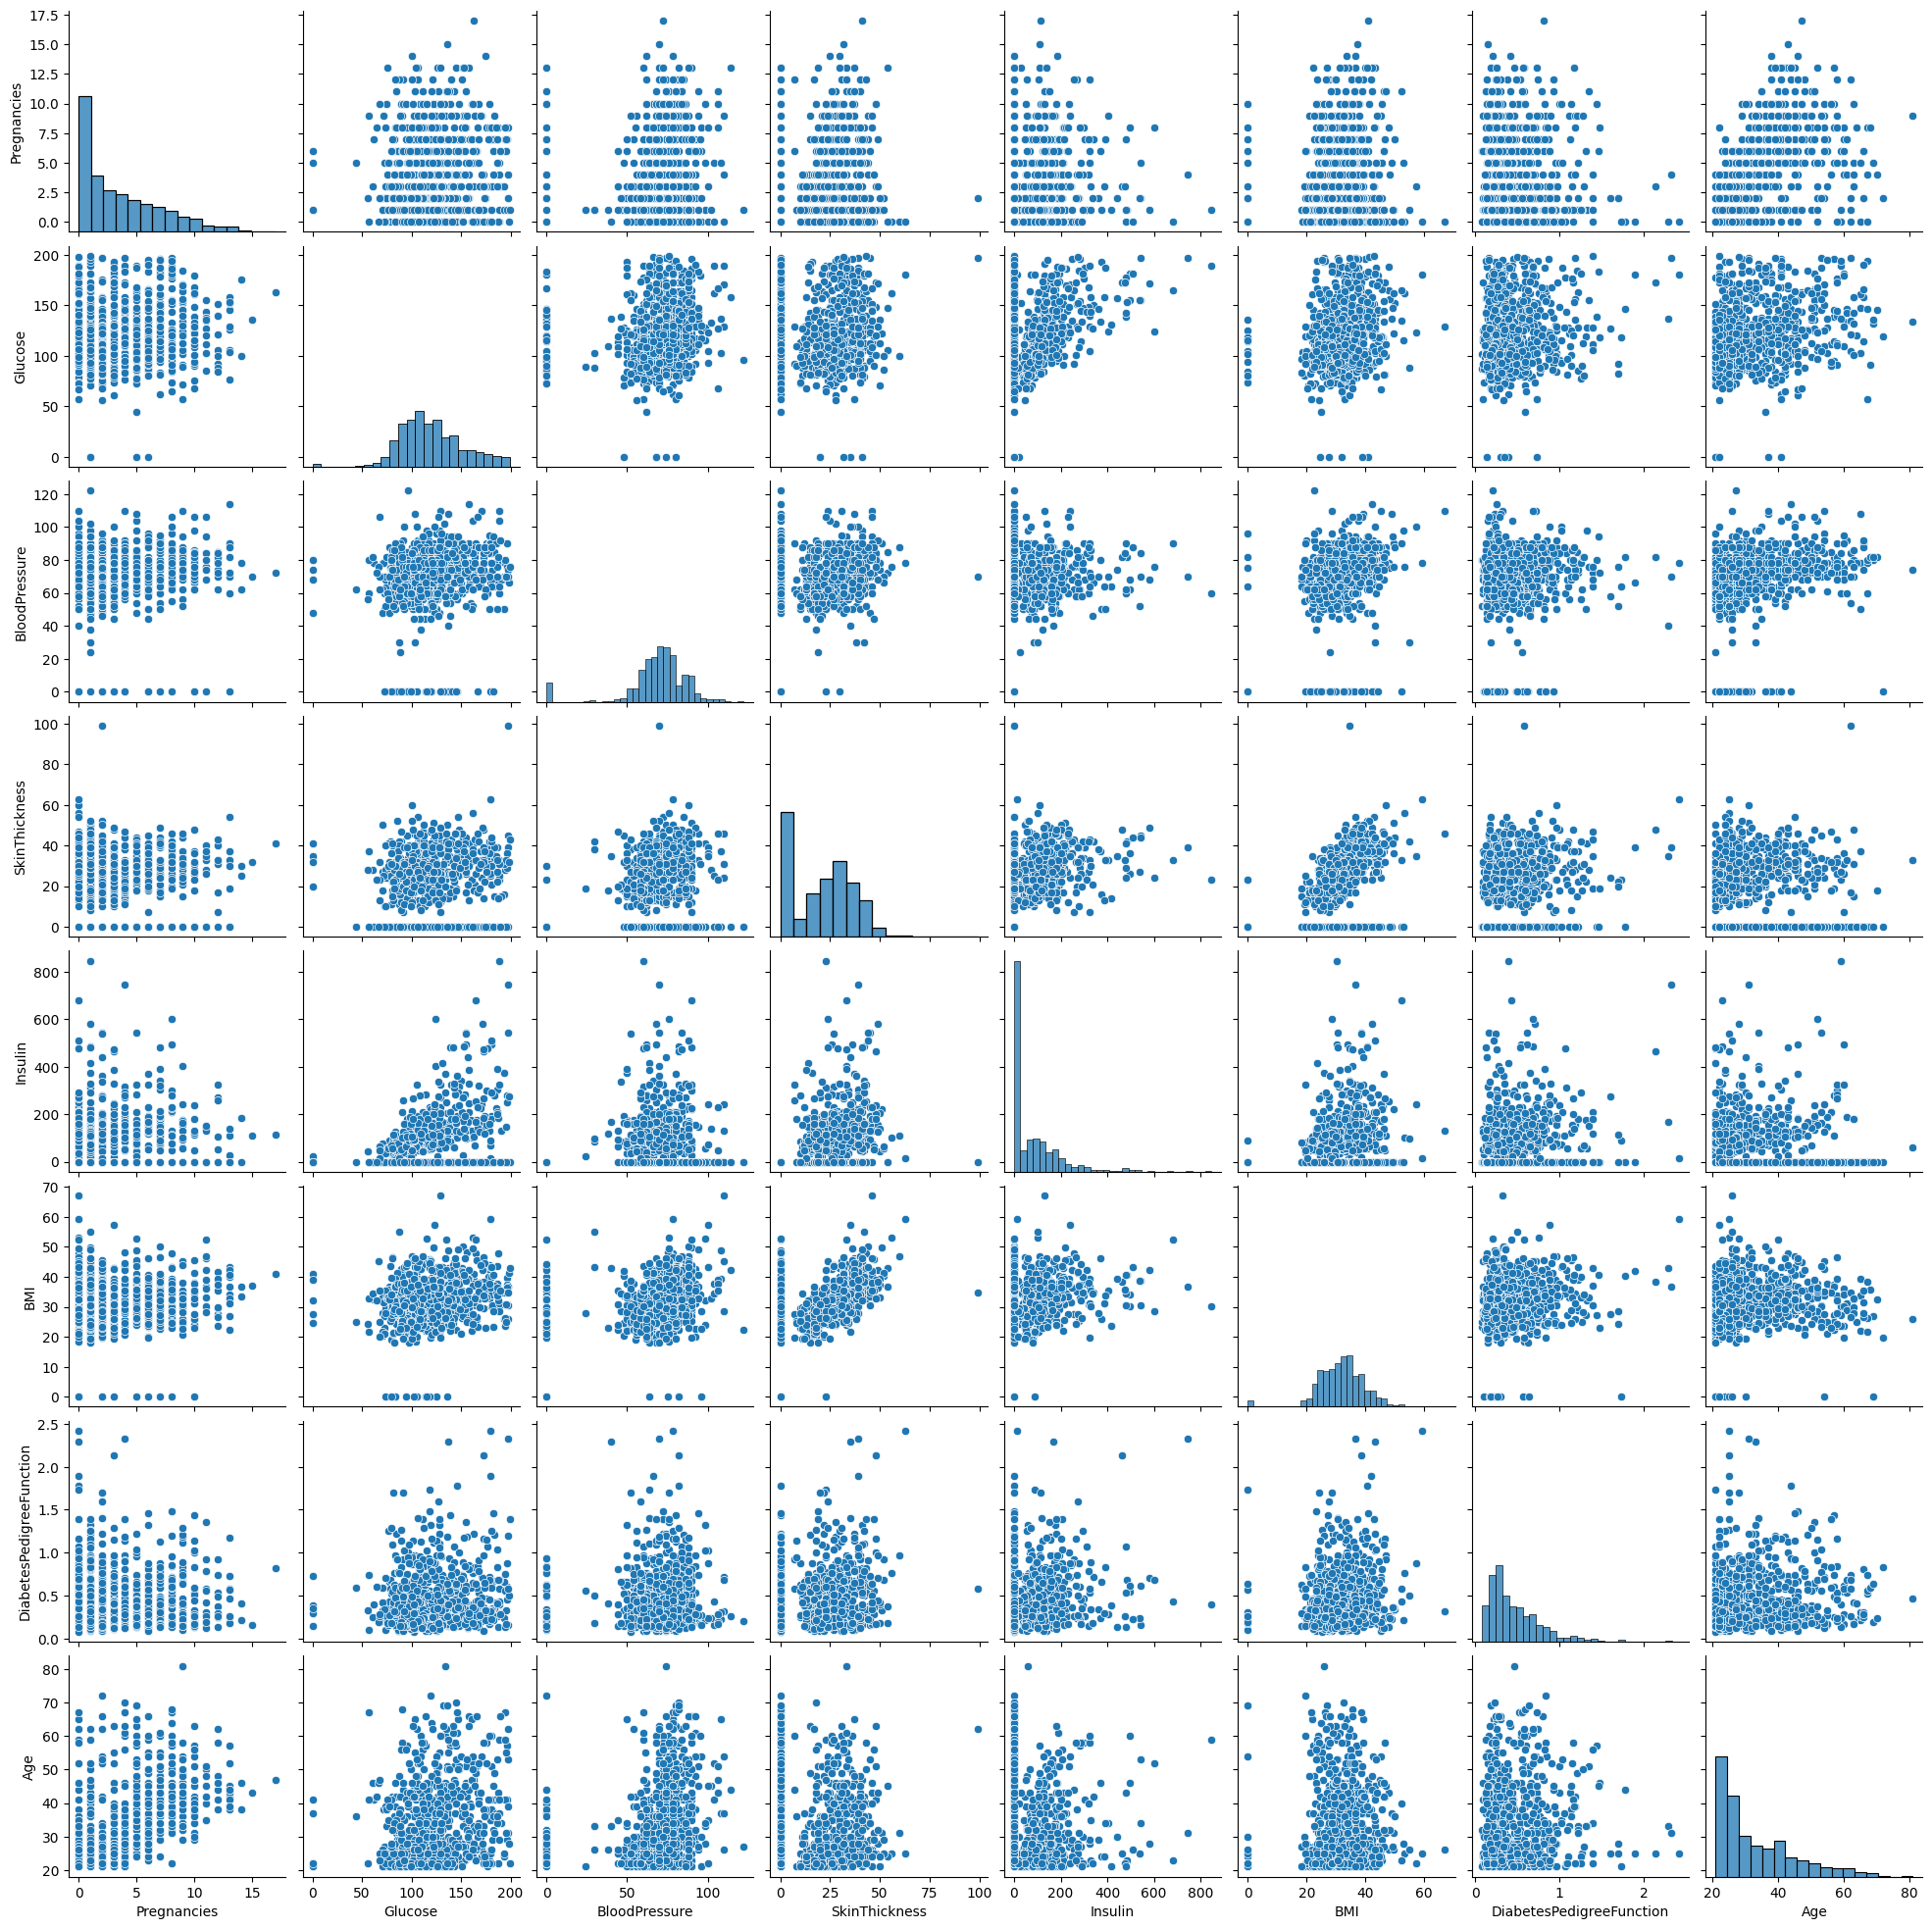

CPU times: user 16 s, sys: 242 ms, total: 16.3 s
Wall time: 16.1 s


In [387]:
%%time
sns.pairplot(data.iloc[:,:-1])
plt.show()

In [388]:
data.corr(method='spearman')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130734,0.185127,-0.085222,-0.126723,0.000132,-0.043242,0.607216,0.198689
Glucose,0.130734,1.000000,0.235191,0.060022,0.213206,0.231141,0.091293,0.285045,0.475776
BloodPressure,0.185127,0.235191,1.000000,0.126486,-0.006771,0.292870,0.030046,0.350895,0.142921
SkinThickness,-0.085222,0.060022,0.126486,1.000000,0.541000,0.443615,0.180390,-0.066795,0.089728
Insulin,-0.126723,0.213206,-0.006771,0.541000,1.000000,0.192726,0.221150,-0.114213,0.066472
BMI,0.000132,0.231141,0.292870,0.443615,0.192726,1.000000,0.141192,0.131186,0.309707
DiabetesPedigreeFunction,-0.043242,0.091293,0.030046,0.180390,0.221150,0.141192,1.000000,0.042909,0.175353
Age,0.607216,0.285045,0.350895,-0.066795,-0.114213,0.131186,0.042909,1.000000,0.309040
Outcome,0.198689,0.475776,0.142921,0.089728,0.066472,0.309707,0.175353,0.309040,1.000000


## We can see that the 'Pregnancies' and 'Age' are highly corelated to each other, This is known as multi-colinearity so we have keep one of them feature which is more corelated with the outcome feature.
## We can see the 'Age' is more corelated with 'outcome' than 'Pregnancies' so we have to remove the 'Pragnancies' column.

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [389]:
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### There is no missing values in the given dataset

# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [390]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [391]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [392]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [393]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=10) 

# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [394]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [395]:
y_pred = model.predict(X_test)

### Classification Report before Hyperparameter Tunning

In [396]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [397]:
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix

[[18  8]
 [ 6  7]]


In [398]:
print(f'Accuracy: {round(accuracy_score(y_test,y_pred)*100,2)} %')

Accuracy: 64.1 %


In [399]:
print('Classification Report\n')
print(classification_report(y_test,y_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        26
           1       0.47      0.54      0.50        13

    accuracy                           0.64        39
   macro avg       0.61      0.62      0.61        39
weighted avg       0.66      0.64      0.65        39



## Pre-Prunning along with Hyperparameter Tunning

In [400]:
from sklearn.model_selection import GridSearchCV

In [401]:
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter':['best','random'],
             'max_features':['sqrt','log2','auto'],
             'max_depth':[2,3,4,5]}

In [402]:
pre_model = GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=10)

In [403]:
%%time
pre_model.fit(X_train,y_train)

CPU times: user 2.94 s, sys: 7.73 ms, total: 2.95 s
Wall time: 2.95 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [404]:
pre_model.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [405]:
pre_y_pred = pre_model.predict(X_test)

# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

## Classification Report after Hyperparameter Tunning

In [406]:
print('Confusion Matrix\n')
print(confusion_matrix(y_test,pre_y_pred))
print(f'Accuracy: {round(accuracy_score(y_test,pre_y_pred)*100,2)} %')
print('Classification Report\n')
print(classification_report(y_test,pre_y_pred))

Confusion Matrix

[[25  1]
 [10  3]]
Accuracy: 71.79 %
Classification Report

              precision    recall  f1-score   support

           0       0.71      0.96      0.82        26
           1       0.75      0.23      0.35        13

    accuracy                           0.72        39
   macro avg       0.73      0.60      0.59        39
weighted avg       0.73      0.72      0.66        39



## ROC Curve
- ### ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classification model at different classification thresholds. It plots the true positive rate (TPR) against the false positive rate (FPR) for different thresholds. The TPR is the proportion of actual positives that are correctly identified as positives (i.e., the recall), while the FPR is the proportion of actual negatives that are incorrectly identified as positives. The ROC curve helps us visualize how well the model is able to distinguish between the positive and negative classes and allows us to choose a classification threshold that balances the tradeoff between TPR and FPR.

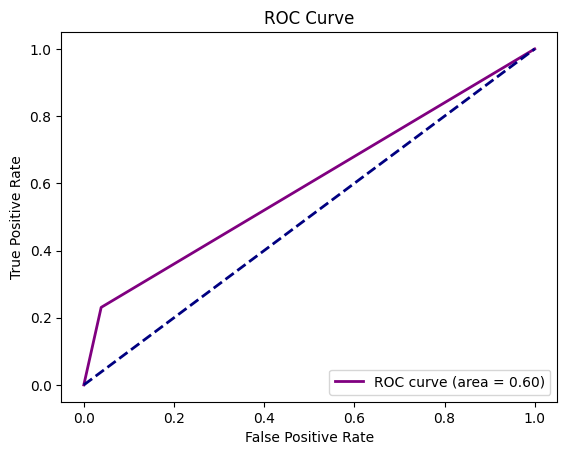

In [407]:
# importing roc_curve and auc (area under curve)
from sklearn.metrics import roc_curve, auc
# false positive rate (fpr) and true positive rate (tpr) for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, pre_y_pred)
# the area under the ROC curve
area = auc(fpr, tpr)
# ROC curve
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

## Interpreting a decision tree involves examining the splits, branches, and leaves to understand how the model is making predictions and which variables are the most important.

In [411]:
classifier = DecisionTreeClassifier(criterion =  'gini',max_depth = 6,max_features = 'sqrt',splitter = 'best')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features='sqrt')

In [409]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


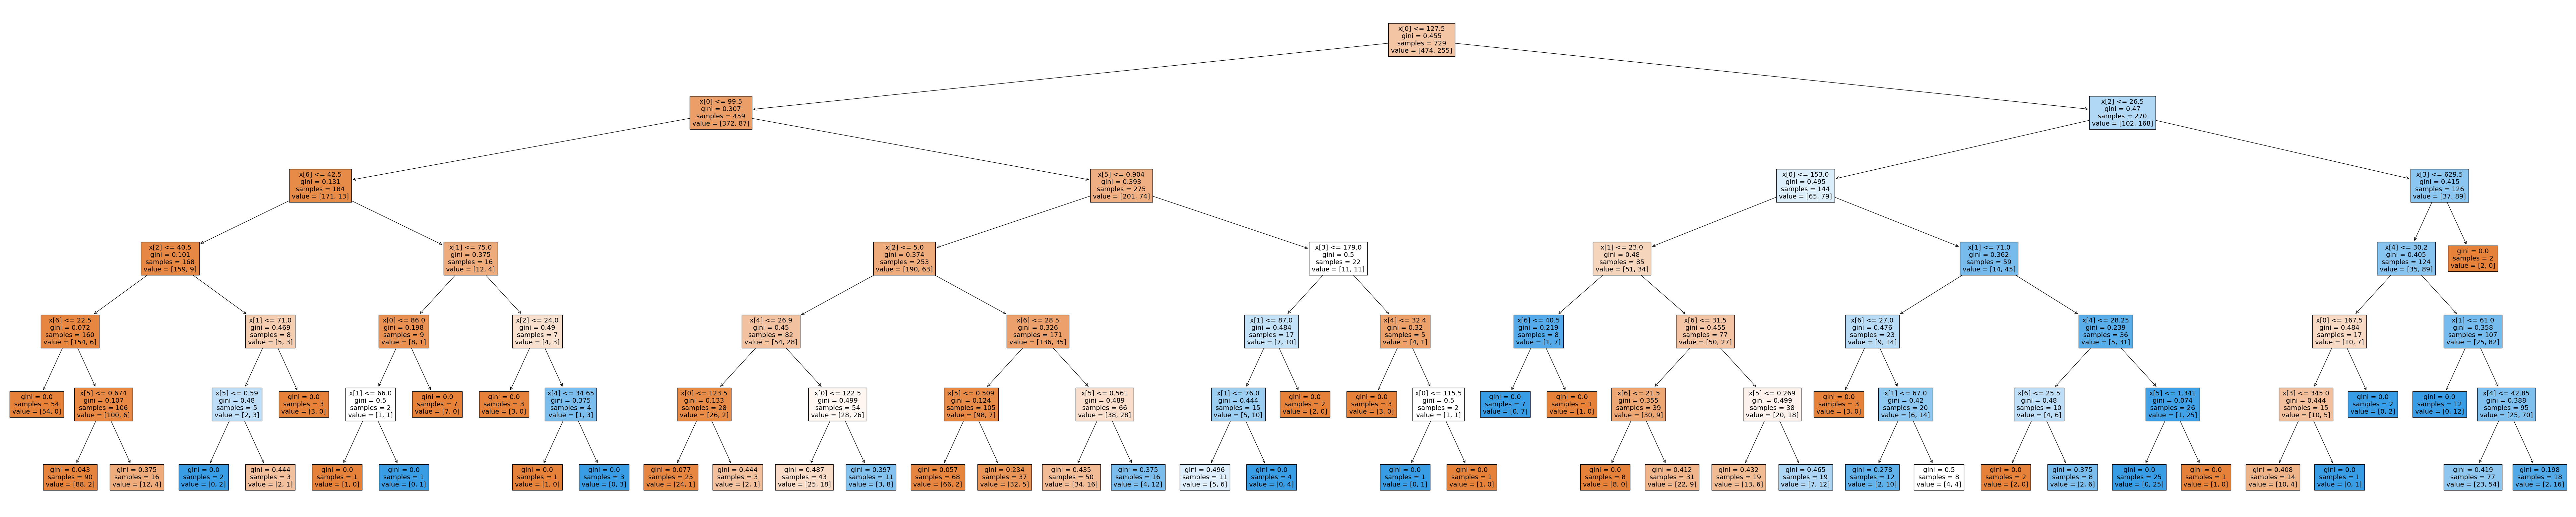

CPU times: user 3.61 s, sys: 212 ms, total: 3.83 s
Wall time: 3.91 s


In [413]:
%%time
from sklearn import tree
plt.figure(figsize=(100,20))
tree.plot_tree(classifier,filled=True)
plt.show()

## We observe the following points from the tree:
- ## 1. The information gain of x[0] is highest so its becomes the root node of the tree with threshold value of 127.5.
- ## 2. After that, the x[2] has highest information gain so its become the child of the root node with threshold values of 26.6and 99.5.
### Let's take a sample data to interpret the decision tree classifier:
- ### x[0] = 150   ---- Glucose
- ### x[1] = 80    ---- BloodPressure
- ### x[2] = 30    ---- SkinThickness
- ### x[3] = 108   ---- Insulin
- ### x[4] = 26.8  ---- BMI
- ### x[5] = 1.56  ---- DiabetesPedigreeFunction
- ### x[6] = 45    ---- Age
## Now, first we go to the root node of the tree:
- ### x[0] is the root node so we start tree traversal from x[0]
- ### x[0] = 150 which is greater than the threshold value of 127.5, so we have to go to the right side of the root node.
- ### Now, x[2] = 30 which is greater than the threshold value of 26.5, so we have to go to the right side of that branch.
- ### Now, x[3] = 108 which is less than the threshold value of 629.5, so we have to go to the left side of that branch.
- ### Now, x[4] = 26.8 which is less than the threshold value of 30.2, so we agian go to the the left side of that branch.
- ### Now again, x[0] = 150 which is less than the threshold value of 167.5, so we agian go to the the left side of that branch.
- ### Now again, x[3] = 108 which is less than the threshold value of 345.0, so we agian go to the the left side of that branch.
- ### Now, finally we reached leaf node at which maximum values are y = 0

## This concludes that the patient with the sample details is not diabetic.
- ### We can validate our result by using classifier.predict() method.

In [426]:
details = [150,80,30,108,26.8,1.56,45]
result = [print('The Patient is not diabetic') if classifier.predict([details]) == 0 else print('The Patient is diabetic')]

The Patient is not diabetic


# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [361]:
X.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [414]:
new_data = pd.Series([
    [150,80,30,108,26.8,1.56,45],
    [140,79,25,89,35.6,-1.64,56],
    [145,98,14,75,38.5,1.23,76],
    [135,81,19,120,31.5,2.56,60],
    [158,64,34,95,24.5,-3.19,32]
])

In [415]:
for i in range(len(new_data)):
    if pre_model.predict([new_data[i]]) == 0:
        print(f'Patient no. {i+1} is not diabetic.')
    else:
        print(f'Patient no. {i+1} is diabetic.')    

Patient no. 1 is not diabetic.
Patient no. 2 is not diabetic.
Patient no. 3 is not diabetic.
Patient no. 4 is not diabetic.
Patient no. 5 is diabetic.
